In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plts
import seaborn as sns


In [ ]:
path = '/content/drive/MyDrive/1739525599_hr_comma_sep.zip'
data= pd.read_csv(path)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
data.isnull().sum()


,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


**there is no null value **

In [ ]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
data_encoded = pd.get_dummies(data, columns=['sales', 'salary'], drop_first=True)
print("Shape of original data:", data.shape)
print("Shape of encoded data:", data_encoded.shape)
data_encoded.head()S

Shape of original data: (14999, 10)
Shape of encoded data: (14999, 19)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False


In [ ]:
turnover_by_department = data.groupby('sales')['left'].mean().sort_values(ascending=False)
print("Employee Turnover Rate by Department:")
print(turnover_by_department)

Employee Turnover Rate by Department:
sales
hr             0.290934
accounting     0.265971
technical      0.256250
support        0.248991
sales          0.244928
marketing      0.236597
IT             0.222494
product_mng    0.219512
RandD          0.153748
management     0.144444
Name: left, dtype: float64


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
turnover_by_salary = data.groupby('salary')['left'].mean().sort_values(ascending=False)
print("Employee Turnover Rate by Salary Level:")
print(turnover_by_salary)

Employee Turnover Rate by Salary Level:
salary
low       0.296884
medium    0.204313
high      0.066289
Name: left, dtype: float64


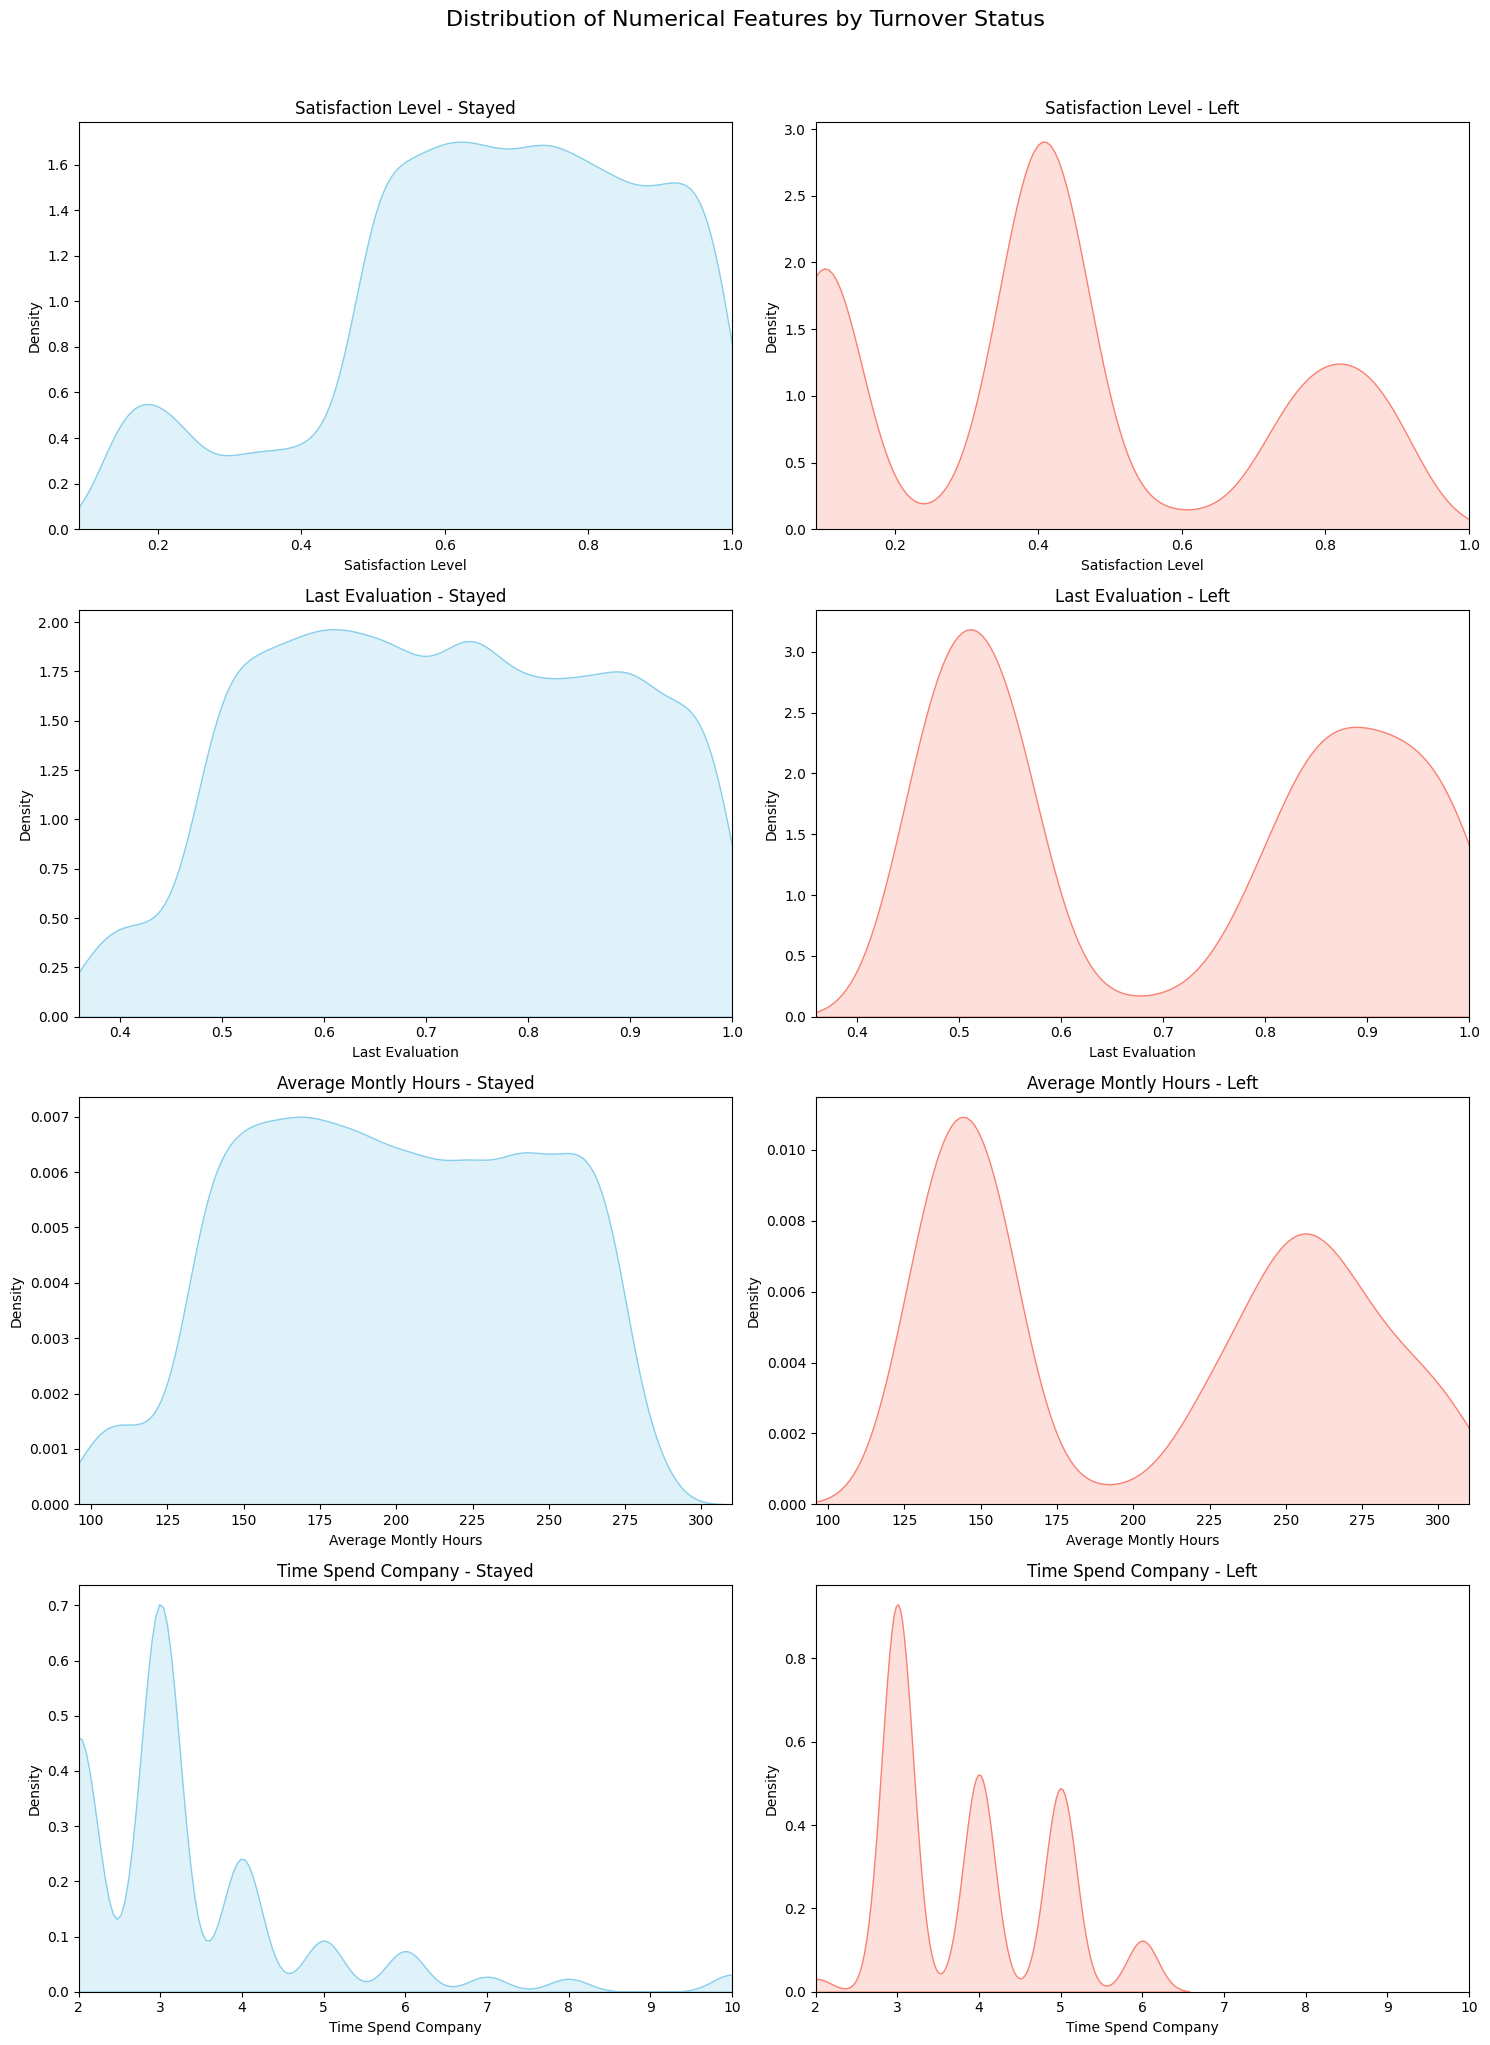

In [ ]:
numerical_features = ['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company']

fig, axes = plt.subplots(len(numerical_features), 2, figsize=(15, 5 * len(numerical_features)))
fig.suptitle('Distribution of Numerical Features by Turnover Status', fontsize=16, y=1.02)

for i, feature in enumerate(numerical_features):
    # Data for employees who stayed (left = 0)
    stayed_data = data[data['left'] == 0][feature]
    # Data for employees who left (left = 1)
    left_data = data[data['left'] == 1][feature]

    # Determine common x-axis limits for comparison
    min_val = min(stayed_data.min(), left_data.min())
    max_val = max(stayed_data.max(), left_data.max())

    # Plot for stayed employees
    sns.kdeplot(stayed_data, fill=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'{feature.replace("_", " ").title()} - Stayed')
    axes[i, 0].set_xlabel(feature.replace("_", " ").title())
    axes[i, 0].set_ylabel('Density')
    axes[i, 0].set_xlim(min_val, max_val)

    # Plot for left employees
    sns.kdeplot(left_data, fill=True, ax=axes[i, 1], color='salmon')
    axes[i, 1].set_title(f'{feature.replace("_", " ").title()} - Left')
    axes[i, 1].set_xlabel(feature.replace("_", " ").title())
    axes[i, 1].set_ylabel('Density')
    axes[i, 1].set_xlim(min_val, max_val)

plt.tight_layout()
plt.show()

In [ ]:
correlation_matrix = data_encoded.corr()
correlation_with_left = correlation_matrix['left'].sort_values(ascending=False)
print("Correlation of Features with Employee Turnover ('left'):")
print(correlation_with_left)

Correlation of Features with Employee Turnover ('left'):
left                     1.000000
time_spend_company       0.144822
salary_low               0.134722
average_montly_hours     0.071287
sales_hr                 0.028249
number_project           0.023787
sales_technical          0.020076
sales_accounting         0.015201
sales_support            0.010700
sales_sales              0.009923
last_evaluation          0.006567
sales_marketing         -0.000859
sales_product_mng       -0.011029
sales_management        -0.046035
sales_RandD             -0.046596
promotion_last_5years   -0.061788
salary_medium           -0.068833
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64


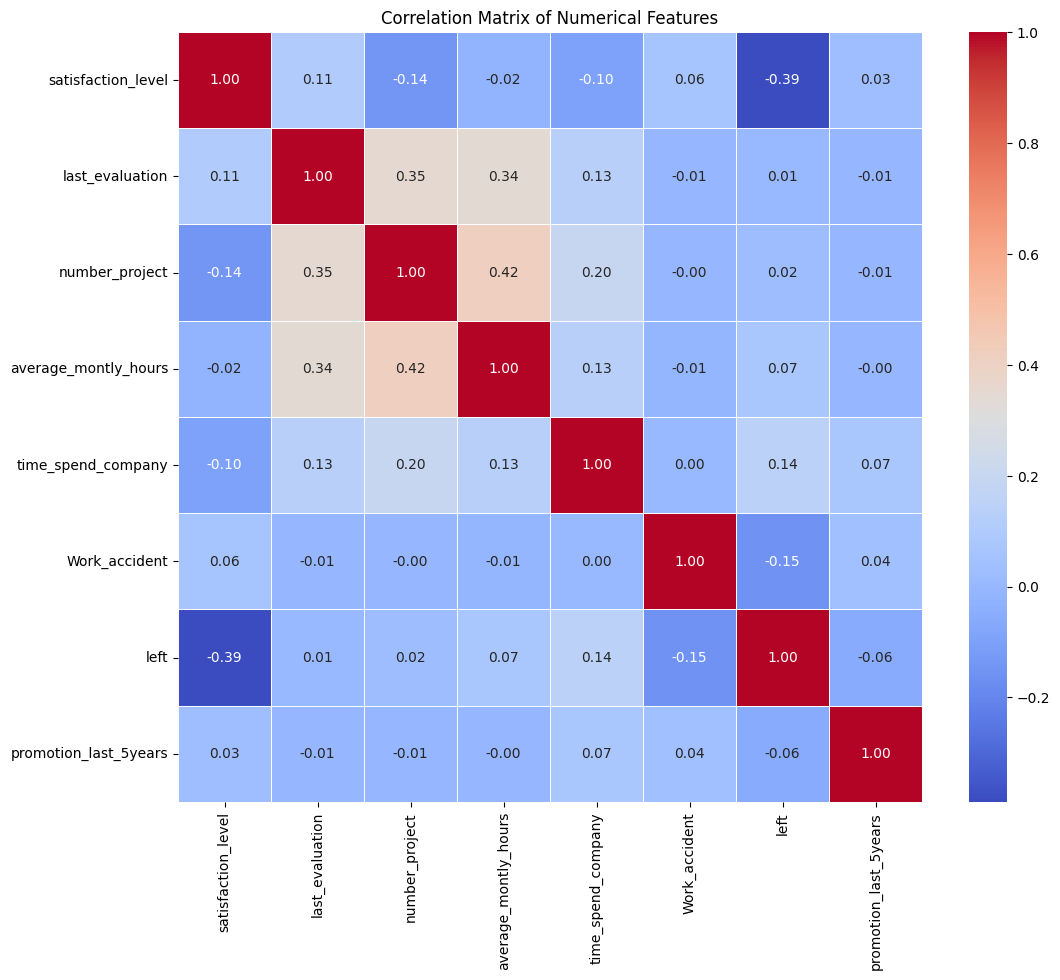

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

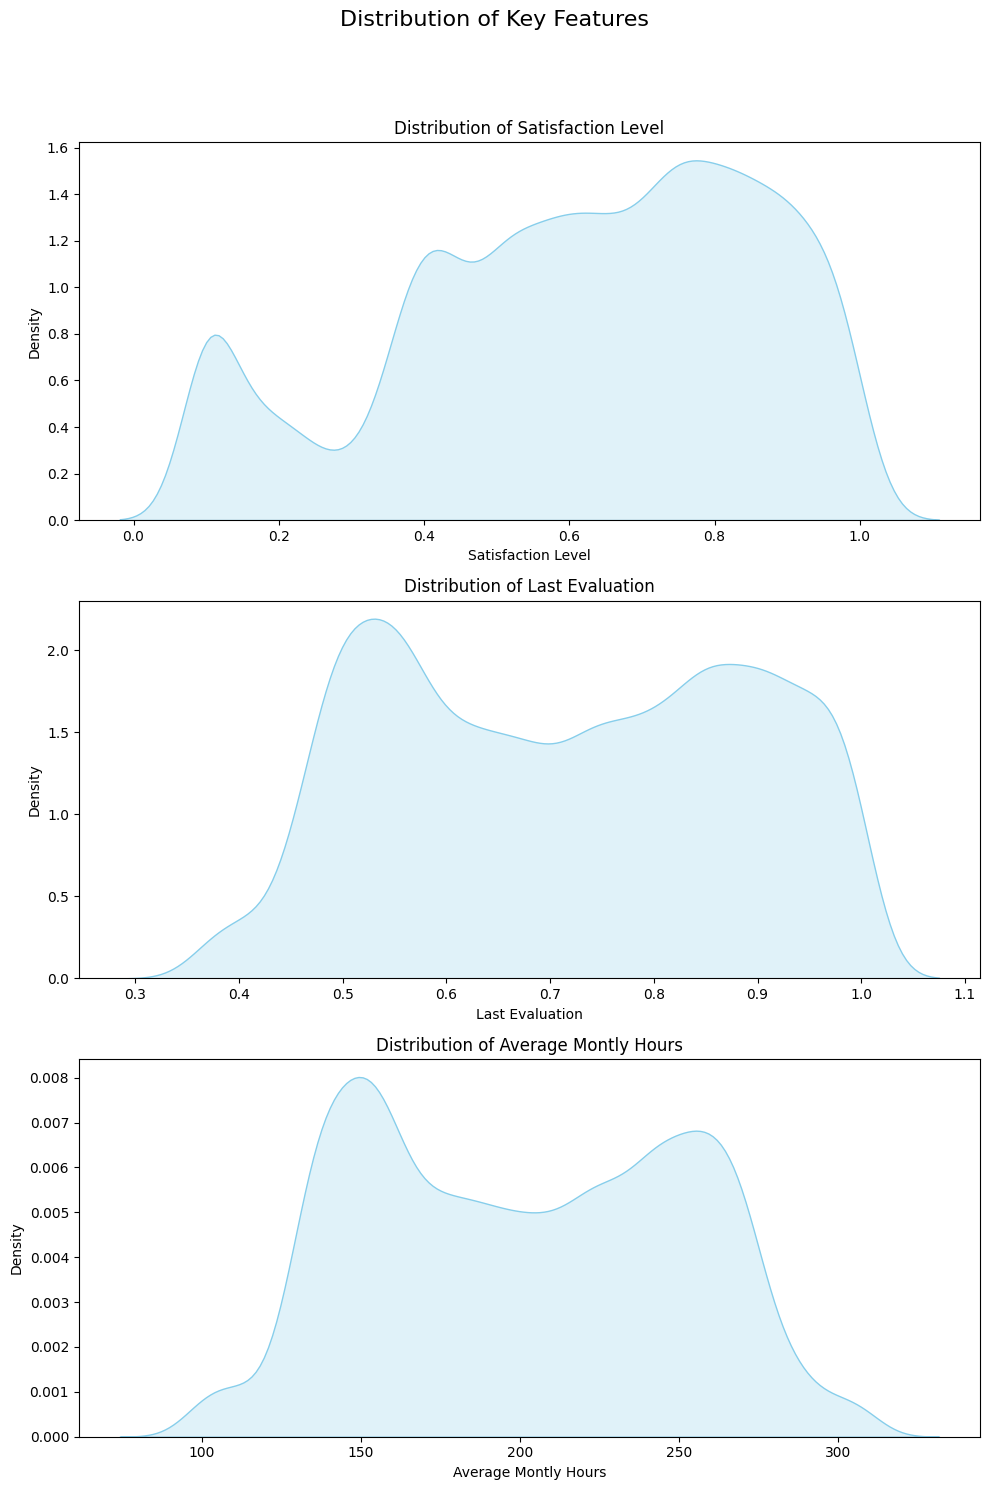

In [ ]:
features_to_plot = ['satisfaction_level', 'last_evaluation', 'average_montly_hours']

fig, axes = plt.subplots(len(features_to_plot), 1, figsize=(10, 5 * len(features_to_plot)))
fig.suptitle('Distribution of Key Features', fontsize=16, y=1.02)

for i, feature in enumerate(features_to_plot):
    sns.kdeplot(data[feature], fill=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {feature.replace("_", " ").title()}')
    axes[i].set_xlabel(feature.replace("_", " ").title())
    axes[i].set_ylabel('Density')

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()

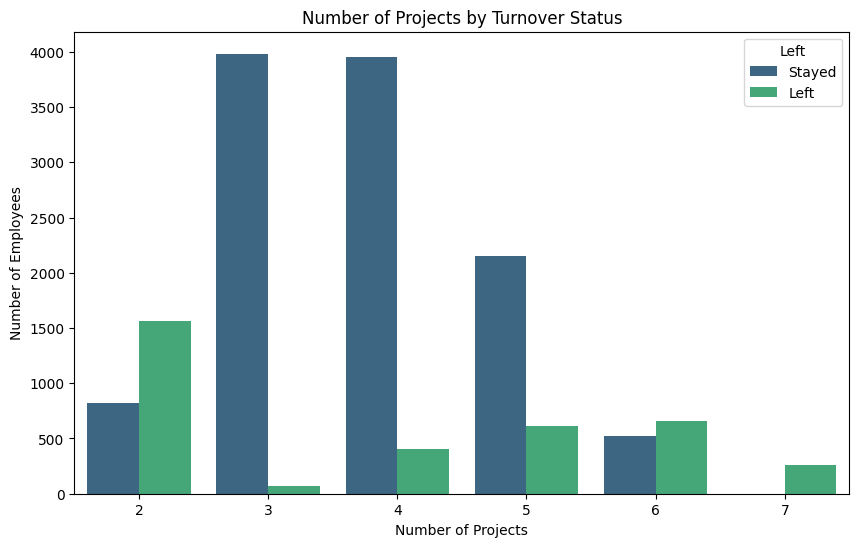

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='number_project', hue='left', data=data, palette='viridis')
plt.title('Number of Projects by Turnover Status')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.9871111111111112

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3428
           1       0.99      0.96      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



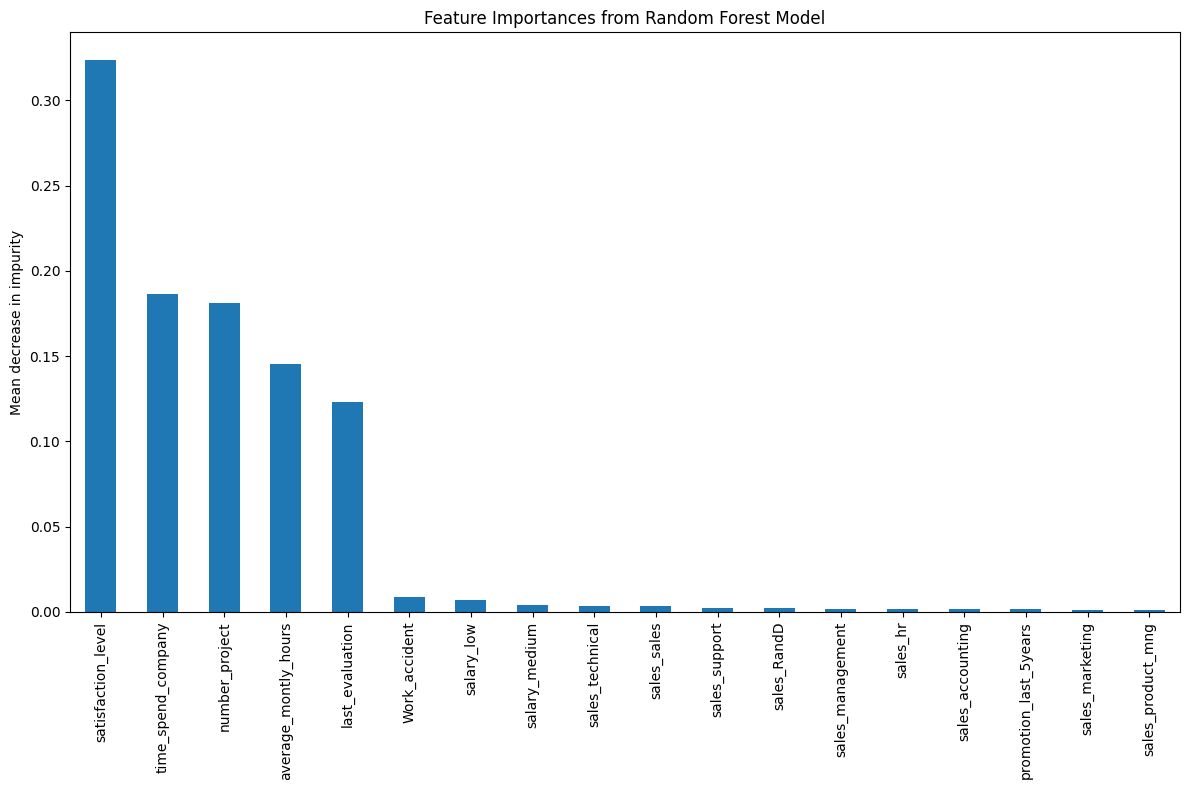

In [ ]:
importances = model.feature_importances_
feature_names = X_train.columns

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(12, 8))
forest_importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title("Feature Importances from Random Forest Model")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

In [ ]:
employees_who_left = data[data['left'] == 1]
print("Shape of employees who left:", employees_who_left.shape)
employees_who_left.head()

Shape of employees who left: (3571, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
X = employees_who_left[['satisfaction_level', 'last_evaluation']]
print("Shape of features for clustering:", X.shape)
X.head()

Shape of features for clustering: (3571, 2)


,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # n_init is set to 10 for explicit initialization
kmeans.fit(X)

employees_who_left['cluster'] = kmeans.labels_
print("First 5 rows of employees_who_left with cluster labels:")
employees_who_left.head()

First 5 rows of employees_who_left with cluster labels:


/tmp/ipython-input-3681832244.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employees_who_left['cluster'] = kmeans.labels_


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,cluster
0,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,0


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # n_init is set to 10 for explicit initialization
kmeans.fit(X)

employees_who_left.loc[:, 'cluster'] = kmeans.labels_
print("First 5 rows of employees_who_left with cluster labels:")
employees_who_left.head()

First 5 rows of employees_who_left with cluster labels:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,cluster
0,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,0


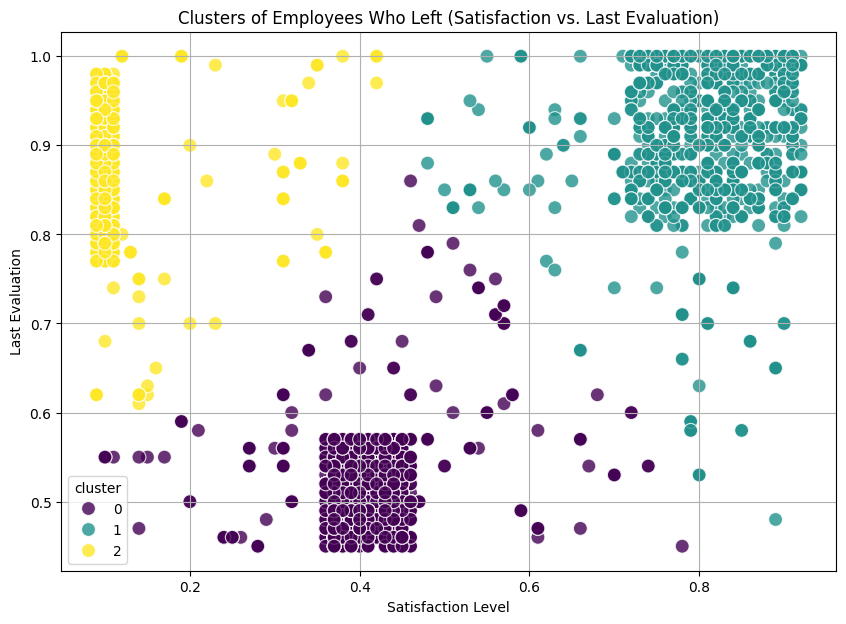

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=employees_who_left, palette='viridis', s=100, alpha=0.8)
plt.title('Clusters of Employees Who Left (Satisfaction vs. Last Evaluation)')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.grid(True)
plt.show()

In [ ]:
cluster_means = employees_who_left.groupby('cluster')[['satisfaction_level', 'last_evaluation']].mean()
print("Mean Satisfaction Level and Last Evaluation by Cluster:")
print(cluster_means)

Mean Satisfaction Level and Last Evaluation by Cluster:
         satisfaction_level  last_evaluation
cluster                                     
0                  0.410145         0.516982
1                  0.808516         0.911709
2                  0.111155         0.869301


In [ ]:
categorical_cols = ['sales', 'salary']
numerical_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']

data_categorical = data[categorical_cols]
data_numerical = data[numerical_cols]

print("Head of data_categorical:")
print(data_categorical.head())
print("\nHead of data_numerical:")
print(data_numerical.head())

Head of data_categorical:
   sales  salary
0  sales     low
1  sales  medium
2  sales  medium
3  sales     low
4  sales     low

Head of data_numerical:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  
0                   3              0     1                      0  
1                   6              0     1                      0  
2                   4              0     1                      0  
3                   5              0     1                      0  
4                   3     

In [ ]:
data_categorical_encoded = pd.get_dummies(data_categorical, drop_first=True)
print("Head of data_categorical_encoded:")
print(data_categorical_encoded.head())
print("\nShape of data_categorical_encoded:")
print(data_categorical_encoded.shape)

Head of data_categorical_encoded:
   sales_RandD  sales_accounting  sales_hr  sales_management  sales_marketing  \
0        False             False     False             False            False   
1        False             False     False             False            False   
2        False             False     False             False            False   
3        False             False     False             False            False   
4        False             False     False             False            False   

   sales_product_mng  sales_sales  sales_support  sales_technical  salary_low  \
0              False         True          False            False        True   
1              False         True          False            False       False   
2              False         True          False            False       False   
3              False         True          False            False        True   
4              False         True          False            False        T

In [ ]:
data_processed = pd.concat([data_numerical, data_categorical_encoded], axis=1)
print("First 5 rows of data_processed:")
print(data_processed.head())
print("\nShape of data_processed:")
print(data_processed.shape)

First 5 rows of data_processed:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

   sales_RandD  sales_accounting  sales_hr  sales_management  sales_mark

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = data_processed.drop('left', axis=1)
y = data_processed['left']

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nProportion of 'left' in original data:\n", y.value_counts(normalize=True))
print("\nProportion of 'left' in y_train:\n", y_train.value_counts(normalize=True))
print("\nProportion of 'left' in y_test:\n", y_test.value_counts(normalize=True))

Shape of X_train: (11999, 18)
Shape of X_test: (3000, 18)
Shape of y_train: (11999,)
Shape of y_test: (3000,)

Proportion of 'left' in original data:
 left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

Proportion of 'left' in y_train:
 left
0    0.761897
1    0.238103
Name: proportion, dtype: float64

Proportion of 'left' in y_test:
 left
0    0.762
1    0.238
Name: proportion, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE
print("SMOTE imported successfully.")

SMOTE imported successfully.


In [ ]:
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original training data shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

print("\nResampled training data shapes:")
print(f"X_train_resampled: {X_train_resampled.shape}")
print(f"y_train_resampled: {y_train_resampled.shape}")

print("\nClass distribution in original y_train:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in resampled y_train_resampled:")
print(y_train_resampled.value_counts(normalize=True))

Original training data shapes:
X_train: (11999, 18)
y_train: (11999,)

Resampled training data shapes:
X_train_resampled: (18284, 18)
y_train_resampled: (18284,)

Class distribution in original y_train:
left
0    0.761897
1    0.238103
Name: proportion, dtype: float64

Class distribution in resampled y_train_resampled:
left
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report

# 2. Initialize a LogisticRegression model
log_reg = LogisticRegression(random_state=42, solver='liblinear')

# 3. Set up a 5-fold stratified cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Perform cross-validation
cv_scores = cross_val_score(log_reg, X_train_resampled, y_train_resampled, cv=skf, scoring='accuracy')

# 5. Print the mean and standard deviation of the cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation of CV accuracy: {cv_scores.std():.4f}")

# 6. Train the LogisticRegression model on the entire X_train_resampled and y_train_resampled dataset
log_reg.fit(X_train_resampled, y_train_resampled)

# 7. Make predictions on the X_test dataset
y_pred_log_reg = log_reg.predict(X_test)

# 8. Generate and print the classification report
print("\nClassification Report for Logistic Regression on Test Set:")
print(classification_report(y_test, y_pred_log_reg))

Cross-validation scores: [0.79846869 0.79382007 0.79655455 0.79928903 0.78938731]
Mean CV accuracy: 0.7955
Standard deviation of CV accuracy: 0.0036

Classification Report for Logistic Regression on Test Set:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      2286
           1       0.51      0.74      0.60       714

    accuracy                           0.77      3000
   macro avg       0.71      0.76      0.72      3000
weighted avg       0.81      0.77      0.78      3000



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report

# 2. Initialize a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# 3. Set up a 5-fold stratified cross-validation strategy (already defined as 'skf')
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Already defined, can reuse

# 4. Perform cross-validation
cv_scores_rf = cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv=skf, scoring='accuracy')

# 5. Print the mean and standard deviation of the cross-validation scores
print(f"Random Forest Cross-validation scores: {cv_scores_rf}")
print(f"Random Forest Mean CV accuracy: {cv_scores_rf.mean():.4f}")
print(f"Random Forest Standard deviation of CV accuracy: {cv_scores_rf.std():.4f}")

# 6. Train the RandomForestClassifier model on the entire X_train_resampled and y_train_resampled dataset
rf_model.fit(X_train_resampled, y_train_resampled)

# 7. Make predictions on the X_test dataset
y_pred_rf = rf_model.predict(X_test)

# 8. Generate and print the classification report
print("\nClassification Report for Random Forest on Test Set:")
print(classification_report(y_test, y_pred_rf))

Random Forest Cross-validation scores: [0.98796828 0.98304621 0.98277276 0.9852338  0.98440919]
Random Forest Mean CV accuracy: 0.9847
Random Forest Standard deviation of CV accuracy: 0.0019

Classification Report for Random Forest on Test Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report

# 2. Initialize a GradientBoostingClassifier model
gbc_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1)

# 3. Set up a 5-fold stratified cross-validation strategy (already defined as 'skf')
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Already defined, can reuse

# 4. Perform cross-validation
cv_scores_gbc = cross_val_score(gbc_model, X_train_resampled, y_train_resampled, cv=skf, scoring='accuracy')

# 5. Print the mean and standard deviation of the cross-validation scores
print(f"Gradient Boosting Cross-validation scores: {cv_scores_gbc}")
print(f"Gradient Boosting Mean CV accuracy: {cv_scores_gbc.mean():.4f}")
print(f"Gradient Boosting Standard deviation of CV accuracy: {cv_scores_gbc.std():.4f}")

# 6. Train the GradientBoostingClassifier model on the entire X_train_resampled and y_train_resampled dataset
gbc_model.fit(X_train_resampled, y_train_resampled)

# 7. Make predictions on the X_test dataset
y_pred_gbc = gbc_model.predict(X_test)

# 8. Generate and print the classification report
print("\nClassification Report for Gradient Boosting on Test Set:")
print(classification_report(y_test, y_pred_gbc))

Gradient Boosting Cross-validation scores: [0.96035001 0.96363139 0.96417829 0.96171725 0.96498906]
Gradient Boosting Mean CV accuracy: 0.9630
Gradient Boosting Standard deviation of CV accuracy: 0.0017

Classification Report for Gradient Boosting on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2286
           1       0.92      0.93      0.93       714

    accuracy                           0.97      3000
   macro avg       0.95      0.96      0.95      3000
weighted avg       0.97      0.97      0.97      3000



ROC AUC Score (using auc function): 0.8154
ROC AUC Score (using roc_auc_score function): 0.8154


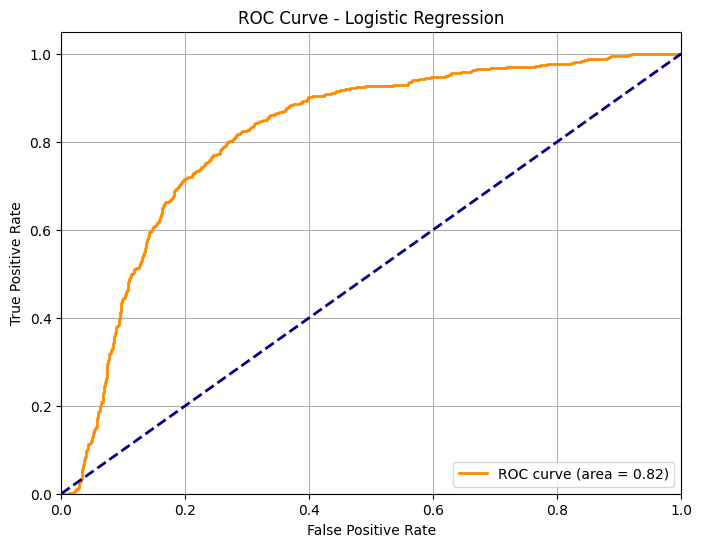

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Calculate predicted probabilities for the positive class (turnover)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

# Compute FPR, TPR, and thresholds
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_pred_proba_log_reg)

# Calculate AUC
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# Alternatively, calculate ROC AUC score directly
roc_auc_score_direct_log_reg = roc_auc_score(y_test, y_pred_proba_log_reg)

print(f"ROC AUC Score (using auc function): {roc_auc_log_reg:.4f}")
print(f"ROC AUC Score (using roc_auc_score function): {roc_auc_score_direct_log_reg:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_log_reg:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Random Forest ROC AUC Score (using auc function): 0.9952
Random Forest ROC AUC Score (using roc_auc_score function): 0.9952


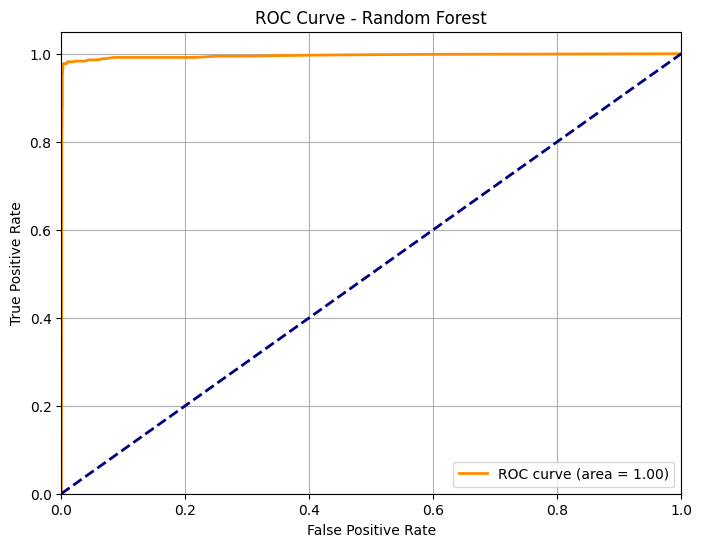

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# 1. Calculate predicted probabilities for the positive class (turnover) for Random Forest
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# 2. Compute FPR, TPR, and thresholds for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

# 3. Calculate AUC for Random Forest
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Alternatively, calculate ROC AUC score directly
roc_auc_score_direct_rf = roc_auc_score(y_test, y_pred_proba_rf)

# 4. Print the calculated ROC AUC score
print(f"Random Forest ROC AUC Score (using auc function): {roc_auc_rf:.4f}")
print(f"Random Forest ROC AUC Score (using roc_auc_score function): {roc_auc_score_direct_rf:.4f}")

# 5. Create a new figure and plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')

# Add a diagonal dashed line for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# 6. Label the x-axis, y-axis, and set the title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')

# 7. Add a legend to the plot
plt.legend(loc="lower right")
plt.grid(True)

# 9. Display the plot
plt.show()

Gradient Boosting ROC AUC Score (using auc function): 0.9856
Gradient Boosting ROC AUC Score (using roc_auc_score function): 0.9856


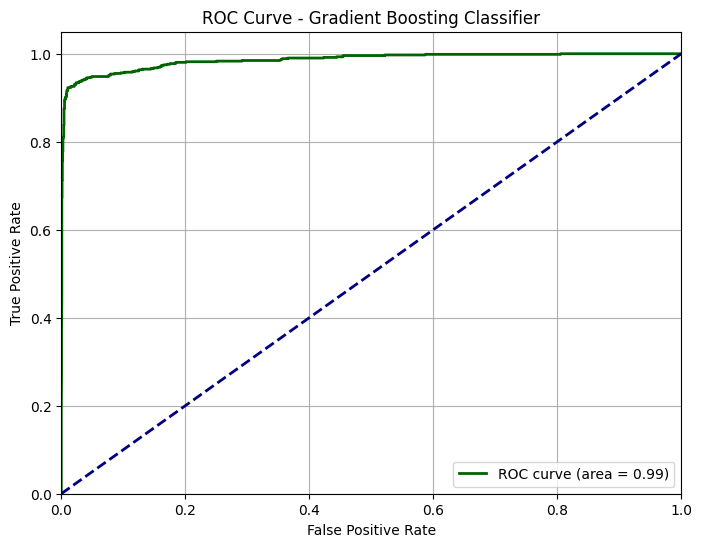

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# 1. Calculate predicted probabilities for the positive class (turnover) for Gradient Boosting Classifier
y_pred_proba_gbc = gbc_model.predict_proba(X_test)[:, 1]

# 2. Compute FPR, TPR, and thresholds for Gradient Boosting Classifier
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test, y_pred_proba_gbc)

# 3. Calculate AUC for Gradient Boosting Classifier
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)

# Alternatively, calculate ROC AUC score directly
roc_auc_score_direct_gbc = roc_auc_score(y_test, y_pred_proba_gbc)

# 4. Print the calculated ROC AUC score
print(f"Gradient Boosting ROC AUC Score (using auc function): {roc_auc_gbc:.4f}")
print(f"Gradient Boosting ROC AUC Score (using roc_auc_score function): {roc_auc_score_direct_gbc:.4f}")

# 5. Create a new figure and plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gbc, tpr_gbc, color='darkgreen', lw=2, label=f'ROC curve (area = {roc_auc_gbc:.2f})')

# Add a diagonal dashed line for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# 6. Label the x-axis, y-axis, and set the title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')

# 7. Add a legend to the plot
plt.legend(loc="lower right")
plt.grid(True)

# 9. Display the plot
plt.show()

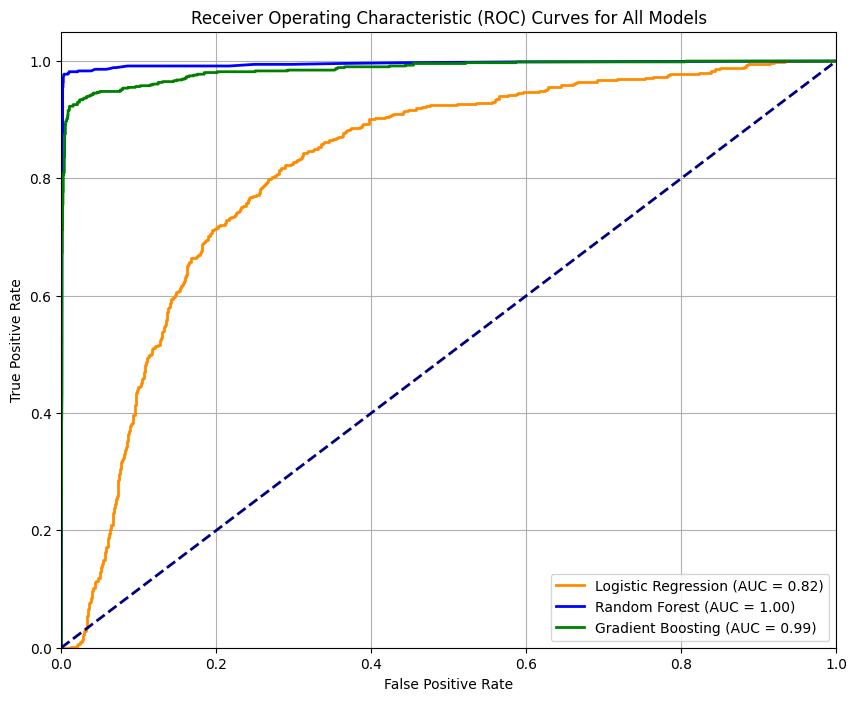

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gbc, tpr_gbc, color='green', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gbc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for All Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

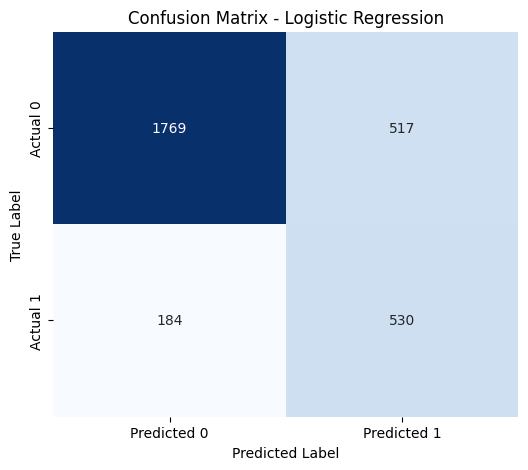

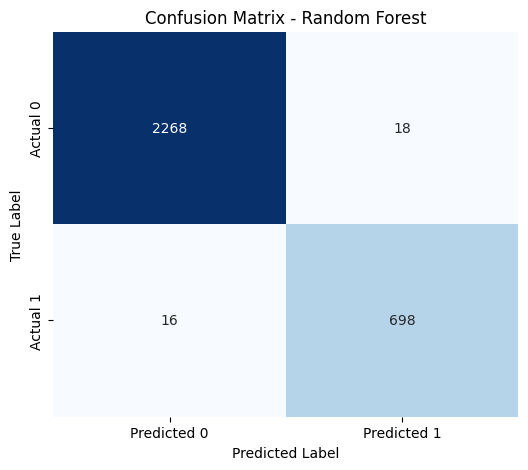

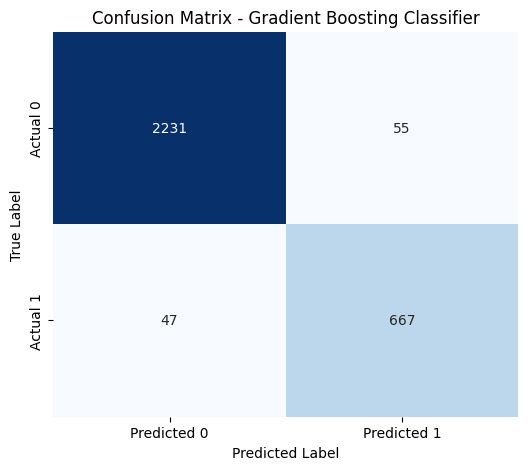

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Confusion Matrix for Gradient Boosting Classifier
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_gbc, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.show()

In [ ]:
turnover_probabilities = rf_model.predict_proba(X_test)[:, 1]
print("First 5 predicted turnover probabilities:")
print(turnover_probabilities[:5])

First 5 predicted turnover probabilities:
[0.   0.6  0.04 0.01 0.  ]


In [ ]:
risk_df = pd.DataFrame(X_test)
risk_df['turnover_probability'] = turnover_probabilities

def categorize_risk(probability):
    if probability < 0.20:
        return 'Safe Zone'
    elif 0.20 <= probability < 0.60:
        return 'Low-Risk Zone'
    elif 0.60 <= probability < 0.90:
        return 'Medium-Risk Zone'
    else:
        return 'High-Risk Zone'

risk_df['risk_zone'] = risk_df['turnover_probability'].apply(categorize_risk)

print("First 5 rows of the risk assessment DataFrame:")
print(risk_df[['turnover_probability', 'risk_zone']].head())

First 5 rows of the risk assessment DataFrame:
       turnover_probability         risk_zone
10627                  0.00         Safe Zone
2703                   0.60  Medium-Risk Zone
6059                   0.04         Safe Zone
3258                   0.01         Safe Zone
4565                   0.00         Safe Zone


In [ ]:
risk_zone_counts = risk_df['risk_zone'].value_counts()
print("Number of employees in each risk zone:")
print(risk_zone_counts)

Number of employees in each risk zone:
risk_zone
Safe Zone           2175
High-Risk Zone       656
Low-Risk Zone        118
Medium-Risk Zone      51
Name: count, dtype: int64


/tmp/ipython-input-3332532745.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_zone_counts.index, y=risk_zone_counts.values, palette='viridis')


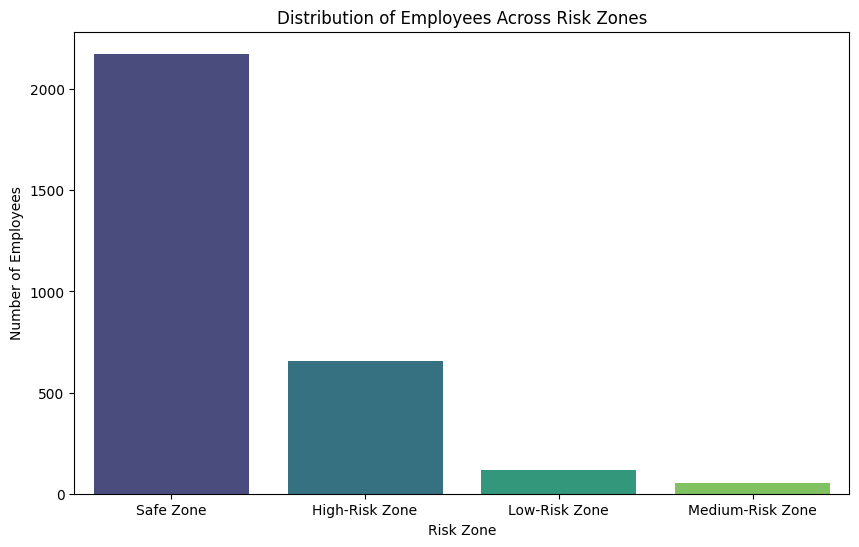

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=risk_zone_counts.index, y=risk_zone_counts.values, palette='viridis')
plt.title('Distribution of Employees Across Risk Zones')
plt.xlabel('Risk Zone')
plt.ylabel('Number of Employees')
plt.show()

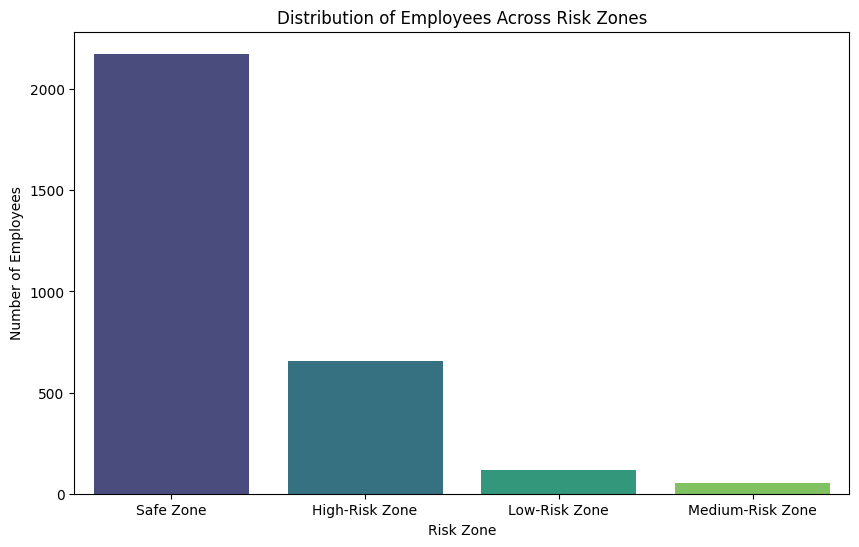

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=risk_zone_counts.index, y=risk_zone_counts.values, hue=risk_zone_counts.index, palette='viridis', legend=False)
plt.title('Distribution of Employees Across Risk Zones')
plt.xlabel('Risk Zone')
plt.ylabel('Number of Employees')
plt.show()